<a href="https://colab.research.google.com/github/dikshakalambe25/LP2/blob/main/textfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
# Install and import required libraries
!pip install nltk
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer, WordNetLemmatizer
import warnings
warnings.filterwarnings("ignore")

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [142]:
# Sample document
text = "A boy and a girl used to play together in the garden. One day their ball got missing.The girl searched for the ball everywhere but couldnot find it.Eventually, they found the ball in the neighbor yard and continued playing happily."
print("Original Text:\n", text)

Original Text:
 A boy and a girl used to play together in the garden. One day their ball got missing.The girl searched for the ball everywhere but couldnot find it.Eventually, they found the ball in the neighbor yard and continued playing happily.


In [143]:
nltk.download('punkt_tab')
# Convert to lowercase
text = text.lower()
print(text)

# Tokenize into words
tokens = word_tokenize(text)

# Remove punctuation and stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [
    word for word in tokens if word not in string.punctuation and word not in stop_words
]

print("\nFiltered Tokens:\n", filtered_tokens)

a boy and a girl used to play together in the garden. one day their ball got missing.the girl searched for the ball everywhere but couldnot find it.eventually, they found the ball in the neighbor yard and continued playing happily.

Filtered Tokens:
 ['boy', 'girl', 'used', 'play', 'together', 'garden', 'one', 'day', 'ball', 'got', 'missing.the', 'girl', 'searched', 'ball', 'everywhere', 'couldnot', 'find', 'it.eventually', 'found', 'ball', 'neighbor', 'yard', 'continued', 'playing', 'happily']


In [144]:
# Sentence Tokenization
from nltk.tokenize import sent_tokenize

sentences = sent_tokenize(text)
print("\nSentence Tokenization:\n", sentences)


Sentence Tokenization:
 ['a boy and a girl used to play together in the garden.', 'one day their ball got missing.the girl searched for the ball everywhere but couldnot find it.eventually, they found the ball in the neighbor yard and continued playing happily.']


In [145]:
# Word Tokenization
tokens = word_tokenize(text)
print("\nWord Tokenization:\n", tokens)


Word Tokenization:
 ['a', 'boy', 'and', 'a', 'girl', 'used', 'to', 'play', 'together', 'in', 'the', 'garden', '.', 'one', 'day', 'their', 'ball', 'got', 'missing.the', 'girl', 'searched', 'for', 'the', 'ball', 'everywhere', 'but', 'couldnot', 'find', 'it.eventually', ',', 'they', 'found', 'the', 'ball', 'in', 'the', 'neighbor', 'yard', 'and', 'continued', 'playing', 'happily', '.']


In [146]:
nltk.download('averaged_perceptron_tagger_eng')
# POS tagging
pos_tags = pos_tag(filtered_tokens)
print("\nPOS Tags:\n", pos_tags)


POS Tags:
 [('boy', 'NN'), ('girl', 'NN'), ('used', 'VBN'), ('play', 'VB'), ('together', 'RB'), ('garden', 'JJ'), ('one', 'CD'), ('day', 'NN'), ('ball', 'NN'), ('got', 'VBD'), ('missing.the', 'JJ'), ('girl', 'NN'), ('searched', 'VBD'), ('ball', 'NN'), ('everywhere', 'RB'), ('couldnot', 'JJ'), ('find', 'VB'), ('it.eventually', 'RB'), ('found', 'VBN'), ('ball', 'NN'), ('neighbor', 'NN'), ('yard', 'NNP'), ('continued', 'VBD'), ('playing', 'VBG'), ('happily', 'RB')]


In [147]:
from wordcloud import WordCloud

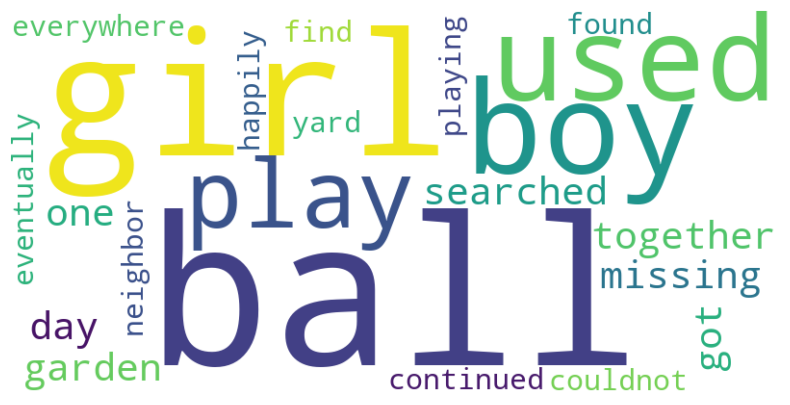

In [148]:
# Use preprocessed tokens (filtered_tokens)
filtered_text = ' '.join(filtered_tokens)

# Generate word cloud from filtered text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [149]:
# Stemming
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
print("\nStemmed Tokens:\n", stemmed_tokens)


Stemmed Tokens:
 ['boy', 'girl', 'use', 'play', 'togeth', 'garden', 'one', 'day', 'ball', 'got', 'missing.th', 'girl', 'search', 'ball', 'everywher', 'couldnot', 'find', 'it.eventu', 'found', 'ball', 'neighbor', 'yard', 'continu', 'play', 'happili']


In [150]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
print("\nLemmatized Tokens:\n", lemmatized_tokens)


Lemmatized Tokens:
 ['boy', 'girl', 'used', 'play', 'together', 'garden', 'one', 'day', 'ball', 'got', 'missing.the', 'girl', 'searched', 'ball', 'everywhere', 'couldnot', 'find', 'it.eventually', 'found', 'ball', 'neighbor', 'yard', 'continued', 'playing', 'happily']


In [151]:
preprocessed_text=" ".join(lemmatized_tokens)
preprocessed_text

'boy girl used play together garden one day ball got missing.the girl searched ball everywhere couldnot find it.eventually found ball neighbor yard continued playing happily'

In [152]:
# Calculate Term Frequency (TF)
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
tf_matrix = vectorizer.fit_transform([preprocessed_text])
tf_df = pd.DataFrame(tf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print("\nTerm Frequency (TF) Matrix:\n", tf_df)


Term Frequency (TF) Matrix:
    ball  boy  continued  couldnot  day  eventually  everywhere  find  found  \
0     3    1          1         1    1           1           1     1      1   

   garden  ...  missing  neighbor  one  play  playing  searched  the  \
0       1  ...        1         1    1     1        1         1    1   

   together  used  yard  
0         1     1     1  

[1 rows x 24 columns]


In [153]:
tf_df = pd.DataFrame(tf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tf_df

,ball,boy,continued,couldnot,day,eventually,everywhere,find,found,garden,...,missing,neighbor,one,play,playing,searched,the,together,used,yard
0,3,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [154]:
# Calculate TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([preprocessed_text])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print("\nTF-IDF Matrix:\n", tfidf_df)


TF-IDF Matrix:
        ball       boy  continued  couldnot       day  eventually  everywhere  \
0  0.507093  0.169031   0.169031  0.169031  0.169031    0.169031    0.169031   

       find     found    garden  ...   missing  neighbor       one      play  \
0  0.169031  0.169031  0.169031  ...  0.169031  0.169031  0.169031  0.169031   

    playing  searched       the  together      used      yard  
0  0.169031  0.169031  0.169031  0.169031  0.169031  0.169031  

[1 rows x 24 columns]
